# Dataset Jugadores

In [20]:
import pandas as pd 

!pip install Unidecode
from unidecode import unidecode


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Dataset Transfermarkt**

In [27]:
#Dataset original
players_tm = pd.read_csv('/content/DataSources/TransfermarktPlayers.csv')

players_tm.head(3)

,player_id,pretty_name,club_id,club_pretty_name,current_club_id,country_of_citizenship,country_of_birth,date_of_birth,position,sub_position,...,foot,height_in_cm,market_value_in_gbp,highest_market_value_in_gbp,agent_name,domestic_competition_id,club_name,image_url,last_season,url
0,254016,Arthur Delalande,855,Ea Guingamp,855,France,France,1992-05-18,Midfield,Central Midfield,...,Right,186,NaN,90000.0,NaN,FR1,ea-guingamp,NaN,2013,https://www.transfermarkt.co.uk/arthur-delalan...
1,51053,Daniel Davari,23,Eintracht Braunschweig,23,Iran,Germany,1988-01-06,Goalkeeper,NaN,...,Right,192,135000.0,1130000.0,NG360,L1,eintracht-braunschweig,NaN,2013,https://www.transfermarkt.co.uk/daniel-davari/...
2,31451,Torsten Oehrl,23,Eintracht Braunschweig,23,Germany,Germany,1986-01-07,Attack,Centre-Forward,...,Right,192,NaN,1130000.0,NaN,L1,eintracht-braunschweig,NaN,2013,https://www.transfermarkt.co.uk/torsten-oehrl/...


In [28]:
#Eliminamos atributos que no seran de utilidad
atributesToDelete = ['current_club_id','country_of_birth','position', 'name','highest_market_value_in_gbp', 'agent_name', 'domestic_competition_id', 'club_name', 'image_url', 'last_season', 'url', ]
players_tm_filtered = players_tm.drop(atributesToDelete, axis = 1)
players_tm_filtered.head(3)


,player_id,pretty_name,club_id,club_pretty_name,country_of_citizenship,date_of_birth,sub_position,foot,height_in_cm,market_value_in_gbp
0,254016,Arthur Delalande,855,Ea Guingamp,France,1992-05-18,Central Midfield,Right,186,NaN
1,51053,Daniel Davari,23,Eintracht Braunschweig,Iran,1988-01-06,NaN,Right,192,135000.0
2,31451,Torsten Oehrl,23,Eintracht Braunschweig,Germany,1986-01-07,Centre-Forward,Right,192,NaN


In [29]:
#Conversion Market Value (GBP a USD)
#Cotización: 1 GBP - 1.2386 USD (average GBP to USD exchange rate 2022, https://www.exchangerates.org.uk/)
gbp_to_usd_rate = 1.2386
players_tm_filtered['market_value_in_gbp'] = players_tm_filtered['market_value_in_gbp']*gbp_to_usd_rate

#Actualizamos nombre columna correspondiente: market_value_in_gbp -> market_value (usd)
players_tm_filtered.rename(columns = {'market_value_in_gbp':'market_value_in_usd'}, inplace = True)
players_tm_filtered.head(3)


,player_id,pretty_name,club_id,club_pretty_name,country_of_citizenship,date_of_birth,sub_position,foot,height_in_cm,market_value_in_usd
0,254016,Arthur Delalande,855,Ea Guingamp,France,1992-05-18,Central Midfield,Right,186,NaN
1,51053,Daniel Davari,23,Eintracht Braunschweig,Iran,1988-01-06,NaN,Right,192,167211.0
2,31451,Torsten Oehrl,23,Eintracht Braunschweig,Germany,1986-01-07,Centre-Forward,Right,192,NaN


In [30]:
#Actualizacion de los nombres de atributos de Dataset Original para construir Nuevo Dataset
players_tm_filtered.rename(columns = {'pretty_name':'known_as',
                                      'club_pretty_name':'club_name',
                                      'country_of_citizenship':'nationality',
                                      'sub_position':'position',
                                      'foot':'preferred_foot',
                                      'height_in_cm':'height_in_cm'
                                      }, inplace = True)
players_tm_filtered.head(5)


,player_id,known_as,club_id,club_name,nationality,date_of_birth,position,preferred_foot,height_in_cm,market_value_in_usd
0,254016,Arthur Delalande,855,Ea Guingamp,France,1992-05-18,Central Midfield,Right,186,NaN
1,51053,Daniel Davari,23,Eintracht Braunschweig,Iran,1988-01-06,NaN,Right,192,167211.0
2,31451,Torsten Oehrl,23,Eintracht Braunschweig,Germany,1986-01-07,Centre-Forward,Right,192,NaN
3,44622,Vladimir Kisenkov,3691,Tom Tomsk,Russia,1981-10-08,Right-Back,Right,182,NaN
4,30802,Oscar Diaz,3302,Ud Almeria,Spain,1984-04-24,Centre-Forward,Right,183,NaN


In [31]:
pd.options.mode.chained_assignment = None  

#NORMALIZACION NOMBRES 
#Normalizamos nombres de los jugadores, removiendo acentos, simbolos y caracteres caracteristicos de otros idiomas
#Ejemplos: 'Kožušček' -> 'Kozuscek', 'François' -> 'Francois'

players = players_tm_filtered['known_as']

for i in range(0,len(players)):
  players[i] = unidecode(players[i])

players_tm_filtered['known_as'] = players

players_tm_filtered.head(3)


,player_id,known_as,club_id,club_name,nationality,date_of_birth,position,preferred_foot,height_in_cm,market_value_in_usd
0,254016,Arthur Delalande,855,Ea Guingamp,France,1992-05-18,Central Midfield,Right,186,NaN
1,51053,Daniel Davari,23,Eintracht Braunschweig,Iran,1988-01-06,NaN,Right,192,167211.0
2,31451,Torsten Oehrl,23,Eintracht Braunschweig,Germany,1986-01-07,Centre-Forward,Right,192,NaN


In [32]:
#Se agrega una columna 'age' correspondiente a la edad calculada de los jugadores 
#Objetivo es matchear con jugadores del otro dataset a partir del nombre y la edad
#Dato 'age' en Fifa23PlayersData actualizado hasta el 2022-07-01 inclusive
from datetime import date

def calculateAge(birthDate):
    age = 2022 - birthDate.year - ((7, 1) < (birthDate.month, birthDate.day))
    return age   

dfcopy = players_tm_filtered.copy()
dates = dfcopy['date_of_birth']

for i in range(0,len(dates)):
  if(not pd.isna(dates[i])):
    year = str(dates[i])[0:4]
    month = str(dates[i])[5:7]
    day = str(dates[i])[8:10]
    dates[i] = calculateAge(date(int(year), int(month), int(day)))
  else:
    dates[i] = -1


players_tm_filtered['age'] = dates

players_tm_filtered.head(3)

,player_id,known_as,club_id,club_name,nationality,date_of_birth,position,preferred_foot,height_in_cm,market_value_in_usd,age
0,254016,Arthur Delalande,855,Ea Guingamp,France,1992-05-18,Central Midfield,Right,186,NaN,30
1,51053,Daniel Davari,23,Eintracht Braunschweig,Iran,1988-01-06,NaN,Right,192,167211.0,34
2,31451,Torsten Oehrl,23,Eintracht Braunschweig,Germany,1986-01-07,Centre-Forward,Right,192,NaN,36


In [33]:
#Transformacion de dato 'position'
#Conversion de nombre completo posicion (ej.: Central Midfield) a la posicion abreviada por sus iniciales (ej.: CM)

for p in players_tm_filtered:
  players_tm_filtered['position'] = players_tm_filtered['position'].str.replace('[^A-Z]', '',  regex=True)

players_tm_filtered.head(5)


,player_id,known_as,club_id,club_name,nationality,date_of_birth,position,preferred_foot,height_in_cm,market_value_in_usd,age
0,254016,Arthur Delalande,855,Ea Guingamp,France,1992-05-18,CM,Right,186,NaN,30
1,51053,Daniel Davari,23,Eintracht Braunschweig,Iran,1988-01-06,NaN,Right,192,167211.0,34
2,31451,Torsten Oehrl,23,Eintracht Braunschweig,Germany,1986-01-07,CF,Right,192,NaN,36
3,44622,Vladimir Kisenkov,3691,Tom Tomsk,Russia,1981-10-08,RB,Right,182,NaN,40
4,30802,Oscar Diaz,3302,Ud Almeria,Spain,1984-04-24,CF,Right,183,NaN,38


**Dataset FIFA23**

In [35]:
players_fifa23 = pd.read_csv('/content/DataSources/Fifa23PlayersData.csv')
players_fifa23.head(3)

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22


In [36]:
#Nos quedaremos con los siguientes atributos
atributes = ['Known As','Full Name','Overall','Value(in Euro)','Best Position',	'Nationality','Age','Height(in cm)','Weight(in kg)','Club Name','Preferred Foot', 'Shooting Total','Passing Total','Dribbling Total','Defending Total','Physicality Total','Freekick Accuracy','Penalties']

players_fifa23_filtered = players_fifa23.loc[:, atributes]
players_fifa23_filtered.head(3)

,Known As,Full Name,Overall,Value(in Euro),Best Position,Nationality,Age,Height(in cm),Weight(in kg),Club Name,Preferred Foot,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Freekick Accuracy,Penalties
0,L. Messi,Lionel Messi,91,54000000,CAM,Argentina,35,169,67,Paris Saint-Germain,Left,89,90,94,34,64,93,75
1,K. Benzema,Karim Benzema,91,64000000,CF,France,34,185,81,Real Madrid CF,Right,88,83,87,39,78,73,84
2,R. Lewandowski,Robert Lewandowski,91,84000000,ST,Poland,33,185,81,FC Barcelona,Right,91,79,86,44,83,85,90


In [37]:
#Conversion Market Value (Euro a USD)
#Cotización: 1 GBP - 1.0533 USD (average Euro to USD exchange rate 2022, https://www.exchangerates.org.uk/)
euro_to_usd_rate = 1.0533
players_fifa23_filtered['Value(in Euro)'] = players_fifa23_filtered['Value(in Euro)']*euro_to_usd_rate

#Actualizamos nombre columna correspondiente: Value(in Euro) -> market_value (usd)
players_fifa23_filtered.rename(columns = {'Value(in Euro)':'market_value_in_usd'}, inplace = True)
players_fifa23_filtered.head(3)

,Known As,Full Name,Overall,market_value_in_usd,Best Position,Nationality,Age,Height(in cm),Weight(in kg),Club Name,Preferred Foot,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Freekick Accuracy,Penalties
0,L. Messi,Lionel Messi,91,56878200.0,CAM,Argentina,35,169,67,Paris Saint-Germain,Left,89,90,94,34,64,93,75
1,K. Benzema,Karim Benzema,91,67411200.0,CF,France,34,185,81,Real Madrid CF,Right,88,83,87,39,78,73,84
2,R. Lewandowski,Robert Lewandowski,91,88477200.0,ST,Poland,33,185,81,FC Barcelona,Right,91,79,86,44,83,85,90


In [38]:
#Actualizacion de los nombres de atributos de Dataset Original para construir Nuevo Dataset
from re import sub
def snake_case(s):
  return '_'.join(
    sub('([A-Z][a-z]+)', r' \1',
    sub('([A-Z]+)', r' \1',
    s.replace('-', ' '))).split()).lower()

#Primero convertimos todos los nombres a un formato snake case para facilitar el trabajo
for col in players_fifa23_filtered.columns:
    players_fifa23_filtered.rename(columns={col:snake_case(col)},inplace=True)

#Luego realizamos cambios mas especificos a los nombres de atributos segun se ajuste al dataframe deseado
players_fifa23_filtered.rename(columns = {'market_value_(usd)':'market_value_in_usd',
                                      'best_position':'position',
                                      'height(in_cm)':'height_in_cm',
                                      'weight(in_kg)':'weight_in_kg'
                                      }, inplace = True)

players_fifa23_filtered.head(3)

,known_as,full_name,overall,market_value_in_usd,position,nationality,age,height_in_cm,weight_in_kg,club_name,preferred_foot,shooting_total,passing_total,dribbling_total,defending_total,physicality_total,freekick_accuracy,penalties
0,L. Messi,Lionel Messi,91,56878200.0,CAM,Argentina,35,169,67,Paris Saint-Germain,Left,89,90,94,34,64,93,75
1,K. Benzema,Karim Benzema,91,67411200.0,CF,France,34,185,81,Real Madrid CF,Right,88,83,87,39,78,73,84
2,R. Lewandowski,Robert Lewandowski,91,88477200.0,ST,Poland,33,185,81,FC Barcelona,Right,91,79,86,44,83,85,90


In [39]:
#Normalizacion nombres jugadores: atributos 'known_as' y 'full_name'
players = players_fifa23_filtered['known_as']
players_fn = players_fifa23_filtered['full_name']

for i in range(0,len(players)):
  players[i] = unidecode(players[i])
  players_fn[i] = unidecode(players_fn[i])

players_fifa23_filtered['known_as'] = players
players_fifa23_filtered['full_name'] = players_fn

players_fifa23_filtered.head(5)

,known_as,full_name,overall,market_value_in_usd,position,nationality,age,height_in_cm,weight_in_kg,club_name,preferred_foot,shooting_total,passing_total,dribbling_total,defending_total,physicality_total,freekick_accuracy,penalties
0,L. Messi,Lionel Messi,91,56878200.0,CAM,Argentina,35,169,67,Paris Saint-Germain,Left,89,90,94,34,64,93,75
1,K. Benzema,Karim Benzema,91,67411200.0,CF,France,34,185,81,Real Madrid CF,Right,88,83,87,39,78,73,84
2,R. Lewandowski,Robert Lewandowski,91,88477200.0,ST,Poland,33,185,81,FC Barcelona,Right,91,79,86,44,83,85,90
3,K. De Bruyne,Kevin De Bruyne,91,113229750.0,CM,Belgium,31,181,70,Manchester City,Right,88,93,87,64,77,83,83
4,K. Mbappe,Kylian Mbappe,91,200653650.0,ST,France,23,182,73,Paris Saint-Germain,Right,89,80,92,36,76,69,80


**Integración entre datasets TransfermarktPlayers y Fifa23PlayersData:**

In [54]:
transfermarktPlayers = players_tm_filtered
fifa23PlayersData = players_fifa23_filtered

Matcheo por nombre de jugador, nacionalidad y edad:

In [55]:
#Matching de jugadores entre ambos conjuntos por 'known_as' 
#Transfermarket(known_as,nationality,age) x FIFA(known_as,nationality,age)
playersUnionByKnownAs = pd.merge(transfermarktPlayers, fifa23PlayersData, how='inner', on=['known_as','nationality','age'])

#playersUnionByKnownAs.to_csv('playersUnionByKnownAs.csv')
playersUnionByKnownAs

,player_id,known_as,club_id,club_name_x,nationality,date_of_birth,position_x,preferred_foot_x,height_in_cm_x,market_value_in_usd_x,...,weight_in_kg,club_name_y,preferred_foot_y,shooting_total,passing_total,dribbling_total,defending_total,physicality_total,freekick_accuracy,penalties
0,293941,Murilo,4750,Sc Olhanense,Brazil,1995-03-08,CF,Right,180,390159.0,...,68,Gil Vicente FC,Left,70,65,79,25,65,72,70
1,143863,Marti Riverola,1025,Fc Bologna,Spain,1991-01-26,CM,Right,177,334422.0,...,72,FC Andorra,Right,59,63,66,33,56,56,59
2,76071,Leandro,6996,Goverla Uzhgorod,Brazil,1983-12-29,LB,Left,183,55737.0,...,77,PGE FKS Stal Mielec,Left,41,56,56,62,71,52,58
3,315312,Juanma Garcia,150,Real Betis Sevilla,Spain,1993-02-20,CF,NaN,167,557370.0,...,62,Albacete BP,Right,71,64,71,28,51,63,75
4,199132,Nono,150,Real Betis Sevilla,Spain,1993-03-30,CM,Right,179,613107.0,...,72,Damac FC,Right,63,70,72,60,63,72,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,610417,Andrew,2424,Gil Vicente Fc,Brazil,2001-07-01,NaN,Right,189,445896.0,...,76,Gil Vicente FC,Right,69,64,72,45,66,8,21
1077,16136,Dante,417,Ogc Nizza,Brazil,1983-10-18,CB,Left,188,891792.0,...,91,OGC Nice,Left,52,68,66,79,78,55,60
1078,478346,Matis Carvalho,969,Montpellier Hsc,Portugal,1999-04-28,NaN,Right,187,222948.0,...,80,Montpellier Hérault SC,Right,61,59,63,37,59,13,18
1079,72857,Pedro Mendes,969,Montpellier Hsc,Portugal,1990-10-01,CB,Right,186,4458960.0,...,78,Montpellier Hérault SC,Right,38,51,61,74,76,52,35


In [56]:
#Matching de jugadores entre ambos conjuntos por 'known_as' y 'full_name'
#Transfermarket(known_as,nationality,age) x FIFA(full_name,nationality,age)
playersUnionByKnownAsFullName = pd.merge(transfermarktPlayers, fifa23PlayersData, left_on=['known_as','nationality','age'], right_on=['full_name','nationality','age'])

playersUnionByKnownAsFullName

,player_id,known_as_x,club_id,club_name_x,nationality,date_of_birth,position_x,preferred_foot_x,height_in_cm_x,market_value_in_usd_x,...,weight_in_kg,club_name_y,preferred_foot_y,shooting_total,passing_total,dribbling_total,defending_total,physicality_total,freekick_accuracy,penalties
0,41362,Gustav Svensson,2227,Sk Tavriya Simferopol,Sweden,1987-02-07,DM,Right,184,334422.0,...,77,IFK Göteborg,Right,46,59,62,69,77,33,45
1,76743,Marcelo Silva,3302,Ud Almeria,Uruguay,1989-03-21,CB,Right,185,334422.0,...,82,Real Salt Lake,Right,38,52,53,63,80,46,49
2,92111,Orhan Ademi,23,Eintracht Braunschweig,Switzerland,1991-10-28,CF,Right,189,307172.8,...,86,AFC UTA Arad,Right,63,53,59,28,75,46,55
3,147049,Salim Khelifi,23,Eintracht Braunschweig,Tunisia,1994-01-26,RM,Right,172,222948.0,...,65,Perth Glory,Right,55,58,64,30,45,54,49
4,104990,Jakub Vojtus,4750,Sc Olhanense,Slovakia,1993-10-22,RW,NaN,186,278685.0,...,74,Rapid București,Right,62,51,59,24,65,40,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5829,770895,Ismael Boura,826,Rc Lens,France,2000-08-14,LB,Left,173,1672110.0,...,68,Racing Club de Lens,Left,47,57,72,63,65,30,38
5830,222859,Florent Mollet,969,Montpellier Hsc,France,1991-11-19,AM,Right,175,6688440.0,...,68,FC Schalke 04,Right,75,76,78,51,64,81,69
5831,695646,Charles Boli,826,Rc Lens,France,1998-08-30,LM,Left,175,445896.0,...,65,Pau FC,Left,57,61,70,45,44,51,48
5832,804817,Adrien Louveau,826,Rc Lens,France,2000-02-01,CB,Right,188,111474.0,...,86,Racing Club de Lens,Left,36,44,46,60,58,26,41


In [57]:
#Se unen los dos conjuntos parciales obtenidos a partir del matcheo entre ambos datasets
players = pd.concat([playersUnionByKnownAsFullName,playersUnionByKnownAs])

players

,player_id,known_as_x,club_id,club_name_x,nationality,date_of_birth,position_x,preferred_foot_x,height_in_cm_x,market_value_in_usd_x,...,club_name_y,preferred_foot_y,shooting_total,passing_total,dribbling_total,defending_total,physicality_total,freekick_accuracy,penalties,known_as
0,41362,Gustav Svensson,2227,Sk Tavriya Simferopol,Sweden,1987-02-07,DM,Right,184,334422.0,...,IFK Göteborg,Right,46,59,62,69,77,33,45,NaN
1,76743,Marcelo Silva,3302,Ud Almeria,Uruguay,1989-03-21,CB,Right,185,334422.0,...,Real Salt Lake,Right,38,52,53,63,80,46,49,NaN
2,92111,Orhan Ademi,23,Eintracht Braunschweig,Switzerland,1991-10-28,CF,Right,189,307172.8,...,AFC UTA Arad,Right,63,53,59,28,75,46,55,NaN
3,147049,Salim Khelifi,23,Eintracht Braunschweig,Tunisia,1994-01-26,RM,Right,172,222948.0,...,Perth Glory,Right,55,58,64,30,45,54,49,NaN
4,104990,Jakub Vojtus,4750,Sc Olhanense,Slovakia,1993-10-22,RW,NaN,186,278685.0,...,Rapid București,Right,62,51,59,24,65,40,64,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,610417,NaN,2424,Gil Vicente Fc,Brazil,2001-07-01,NaN,Right,189,445896.0,...,Gil Vicente FC,Right,69,64,72,45,66,8,21,Andrew
1077,16136,NaN,417,Ogc Nizza,Brazil,1983-10-18,CB,Left,188,891792.0,...,OGC Nice,Left,52,68,66,79,78,55,60,Dante
1078,478346,NaN,969,Montpellier Hsc,Portugal,1999-04-28,NaN,Right,187,222948.0,...,Montpellier Hérault SC,Right,61,59,63,37,59,13,18,Matis Carvalho
1079,72857,NaN,969,Montpellier Hsc,Portugal,1990-10-01,CB,Right,186,4458960.0,...,Montpellier Hérault SC,Right,38,51,61,74,76,52,35,Pedro Mendes


Limpieza de los datos integrados:

In [58]:
print(players.columns)
dfcopy = players.copy()

#Por último, realizaremos un filtrado de atributos 
#al dataset Players obtenido resultante de la integracion de ambos conjuntos

#Se integran los datos de las columnas 'known_as' y 'known_as_x' en la primera
#Luego, se elimina la columna 'known_as_x'
players['known_as'] = dfcopy['known_as'].fillna(dfcopy['known_as_x'])

players = players.drop(['known_as_x'], axis = 1)
players = players.drop(['known_as_y'], axis = 1)

#ATRIBUTOS DUPLICADOS con VALORES DIFERENTES
#Se eliminaran las columnas que contenga el dato más desactualizado, 
#dejando aquellos correspondientes al dataset de Fifa23PlayersData al haber sido actualizado más recientemente
atributesToDelete = ['club_name_x','position_x','height_in_cm_x', 'preferred_foot_x',
                     'market_value_in_usd_x']

#Antes de eliminar se integraran los datos de las columnas a eliminar que podrian no estar (NaN) en la columna que se mantiene
players['club_name_y'] = dfcopy['club_name_y'].fillna(dfcopy['club_name_x'])
players['position_y'] = dfcopy['position_y'].fillna(dfcopy['position_x'])
players['height_in_cm_y'] = dfcopy['height_in_cm_y'].fillna(dfcopy['height_in_cm_x'])
players['preferred_foot_y'] = dfcopy['preferred_foot_y'].fillna(dfcopy['preferred_foot_x'])
players['market_value_in_usd_y'] = dfcopy['market_value_in_usd_y'].fillna(dfcopy['market_value_in_usd_x'])

players = players.drop(atributesToDelete, axis = 1)


#Por ultimo se renombran atributos y se obtiene el conjunto de datos final
players.rename(columns = {'club_name_y':'club_name',
                                      'position_y':'position',
                                      'height_in_cm_y':'height_in_cm',
                                      'preferred_foot_y':'preferred_foot',
                                      'market_value_in_usd_y':'market_value_in_usd'
                                      }, inplace = True)

players

Index(['player_id', 'known_as_x', 'club_id', 'club_name_x', 'nationality',
       'date_of_birth', 'position_x', 'preferred_foot_x', 'height_in_cm_x',
       'market_value_in_usd_x', 'age', 'known_as_y', 'full_name', 'overall',
       'market_value_in_usd_y', 'position_y', 'height_in_cm_y', 'weight_in_kg',
       'club_name_y', 'preferred_foot_y', 'shooting_total', 'passing_total',
       'dribbling_total', 'defending_total', 'physicality_total',
       'freekick_accuracy', 'penalties', 'known_as'],
      dtype='object')


,player_id,club_id,nationality,date_of_birth,age,full_name,overall,market_value_in_usd,position,height_in_cm,...,club_name,preferred_foot,shooting_total,passing_total,dribbling_total,defending_total,physicality_total,freekick_accuracy,penalties,known_as
0,41362,2227,Sweden,1987-02-07,35,Gustav Svensson,69,421320.0,CDM,184,...,IFK Göteborg,Right,46,59,62,69,77,33,45,Gustav Svensson
1,76743,3302,Uruguay,1989-03-21,33,Marcelo Silva,66,421320.0,CB,185,...,Real Salt Lake,Right,38,52,53,63,80,46,49,Marcelo Silva
2,92111,23,Switzerland,1991-10-28,30,Orhan Ademi,64,605647.5,ST,188,...,AFC UTA Arad,Right,63,53,59,28,75,46,55,Orhan Ademi
3,147049,23,Tunisia,1994-01-26,28,Salim Khelifi,62,421320.0,RM,173,...,Perth Glory,Right,55,58,64,30,45,54,49,Salim Khelifi
4,104990,4750,Slovakia,1993-10-22,28,Jakub Vojtus,61,342322.5,ST,186,...,Rapid București,Right,62,51,59,24,65,40,64,Jakub Vojtus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,610417,2424,Brazil,2001-07-01,21,Andrew da Silva Ventura,70,3581220.0,GK,189,...,Gil Vicente FC,Right,69,64,72,45,66,8,21,Andrew
1077,16136,417,Brazil,1983-10-18,38,Dante Bonfim Costa Santos,78,2633250.0,CB,189,...,OGC Nice,Left,52,68,66,79,78,55,60,Dante
1078,478346,969,Portugal,1999-04-28,23,Matis Carvalho,61,658312.5,GK,186,...,Montpellier Hérault SC,Right,61,59,63,37,59,13,18,Matis Carvalho
1079,72857,969,Portugal,1990-10-01,31,Pedro Filipe Teodosio Mendes,74,3054570.0,CB,186,...,Montpellier Hérault SC,Right,38,51,61,74,76,52,35,Pedro Mendes


**Dataset Players finalizado:**

In [59]:

#Se guarda el dataset construido a partir de la integración en un archivo csv:
players.to_csv('Players.csv')

players

,player_id,club_id,nationality,date_of_birth,age,full_name,overall,market_value_in_usd,position,height_in_cm,...,club_name,preferred_foot,shooting_total,passing_total,dribbling_total,defending_total,physicality_total,freekick_accuracy,penalties,known_as
0,41362,2227,Sweden,1987-02-07,35,Gustav Svensson,69,421320.0,CDM,184,...,IFK Göteborg,Right,46,59,62,69,77,33,45,Gustav Svensson
1,76743,3302,Uruguay,1989-03-21,33,Marcelo Silva,66,421320.0,CB,185,...,Real Salt Lake,Right,38,52,53,63,80,46,49,Marcelo Silva
2,92111,23,Switzerland,1991-10-28,30,Orhan Ademi,64,605647.5,ST,188,...,AFC UTA Arad,Right,63,53,59,28,75,46,55,Orhan Ademi
3,147049,23,Tunisia,1994-01-26,28,Salim Khelifi,62,421320.0,RM,173,...,Perth Glory,Right,55,58,64,30,45,54,49,Salim Khelifi
4,104990,4750,Slovakia,1993-10-22,28,Jakub Vojtus,61,342322.5,ST,186,...,Rapid București,Right,62,51,59,24,65,40,64,Jakub Vojtus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,610417,2424,Brazil,2001-07-01,21,Andrew da Silva Ventura,70,3581220.0,GK,189,...,Gil Vicente FC,Right,69,64,72,45,66,8,21,Andrew
1077,16136,417,Brazil,1983-10-18,38,Dante Bonfim Costa Santos,78,2633250.0,CB,189,...,OGC Nice,Left,52,68,66,79,78,55,60,Dante
1078,478346,969,Portugal,1999-04-28,23,Matis Carvalho,61,658312.5,GK,186,...,Montpellier Hérault SC,Right,61,59,63,37,59,13,18,Matis Carvalho
1079,72857,969,Portugal,1990-10-01,31,Pedro Filipe Teodosio Mendes,74,3054570.0,CB,186,...,Montpellier Hérault SC,Right,38,51,61,74,76,52,35,Pedro Mendes


**Dataset FifaWorldCup2022Squads** (se agrega atributo *player_id*)

In [65]:
#Dataset orignal
fifaworldcup2022_squads = pd.read_csv('/content/DataSources/FifaWorldCup2022Squads.csv')
fifaworldcup2022_squads

,player name,nationality
0,Saad Al-Sheeb,Qatar
1,Yousef Hassan,Qatar
2,Meshaal Barsham,Qatar
3,Salah Zakaria,Qatar
4,Abdelkarim Hassan,Qatar
...,...,...
905,Chang Hoon Kwon,Korea Republic
906,Seung Beom Ko,Korea Republic
907,Won Sang Um,Korea Republic
908,Heung Min Son,Korea Republic


In [66]:
#NORMALIZACION NOMBRES 
#Normalizamos nombres de los jugadores, removiendo acentos, simbolos y caracteres caracteristicos de otros idiomas
#Ejemplos: 'Kožušček' -> 'Kozuscek', 'François' -> 'Francois'
playersAux = fifaworldcup2022_squads['player name']

for i in range(0,len(playersAux)):
  playersAux[i] = unidecode(playersAux[i])

fifaworldcup2022_squads['player name'] = playersAux

for col in fifaworldcup2022_squads.columns:
    fifaworldcup2022_squads['player name'] = fifaworldcup2022_squads['player name'].str.replace('-', ' ')

fifaworldcup2022_squads.head(3)

,player name,nationality
0,Saad Al Sheeb,Qatar
1,Yousef Hassan,Qatar
2,Meshaal Barsham,Qatar


In [72]:
fwc2022squads = fifaworldcup2022_squads

fwc2022squads.rename(columns = {'player name':'known_as'
                                      }, inplace = True)

#Matching de jugadores entre ambos conjuntos por 'player_name' y 'known_as'
#fwc2022squads(known_as,nationality) x players(full_name,nationality)
players_aux = pd.merge(fwc2022squads, players, how='left', on=['known_as','nationality'])

#Nos quedaremos con los siguientes atributos
atributes = ['player_id','known_as', 'nationality']
players_aux = players_aux.loc[:, atributes]

players_aux

players_aux


,player_id,known_as,nationality
0,NaN,Saad Al Sheeb,Qatar
1,NaN,Yousef Hassan,Qatar
2,NaN,Meshaal Barsham,Qatar
3,NaN,Salah Zakaria,Qatar
4,171412.0,Abdelkarim Hassan,Qatar
...,...,...,...
925,NaN,Chang Hoon Kwon,Korea Republic
926,NaN,Seung Beom Ko,Korea Republic
927,NaN,Won Sang Um,Korea Republic
928,NaN,Heung Min Son,Korea Republic


In [75]:
fifaworldcup2022_squads = players_aux

fwc2022squads.rename(columns = {'known_as':'player_name'
                                      }, inplace = True)

fifaworldcup2022_squads

,player_id,known_as,nationality
0,NaN,Saad Al Sheeb,Qatar
1,NaN,Yousef Hassan,Qatar
2,NaN,Meshaal Barsham,Qatar
3,NaN,Salah Zakaria,Qatar
4,171412.0,Abdelkarim Hassan,Qatar
...,...,...,...
925,NaN,Chang Hoon Kwon,Korea Republic
926,NaN,Seung Beom Ko,Korea Republic
927,NaN,Won Sang Um,Korea Republic
928,NaN,Heung Min Son,Korea Republic


In [76]:
#Se guarda el csv actualizado :
fifaworldcup2022_squads.to_csv('FifaWorldCup2022Squads.csv')

players

,player_id,club_id,nationality,date_of_birth,age,full_name,overall,market_value_in_usd,position,height_in_cm,...,club_name,preferred_foot,shooting_total,passing_total,dribbling_total,defending_total,physicality_total,freekick_accuracy,penalties,known_as
0,41362,2227,Sweden,1987-02-07,35,Gustav Svensson,69,421320.0,CDM,184,...,IFK Göteborg,Right,46,59,62,69,77,33,45,Gustav Svensson
1,76743,3302,Uruguay,1989-03-21,33,Marcelo Silva,66,421320.0,CB,185,...,Real Salt Lake,Right,38,52,53,63,80,46,49,Marcelo Silva
2,92111,23,Switzerland,1991-10-28,30,Orhan Ademi,64,605647.5,ST,188,...,AFC UTA Arad,Right,63,53,59,28,75,46,55,Orhan Ademi
3,147049,23,Tunisia,1994-01-26,28,Salim Khelifi,62,421320.0,RM,173,...,Perth Glory,Right,55,58,64,30,45,54,49,Salim Khelifi
4,104990,4750,Slovakia,1993-10-22,28,Jakub Vojtus,61,342322.5,ST,186,...,Rapid București,Right,62,51,59,24,65,40,64,Jakub Vojtus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,610417,2424,Brazil,2001-07-01,21,Andrew da Silva Ventura,70,3581220.0,GK,189,...,Gil Vicente FC,Right,69,64,72,45,66,8,21,Andrew
1077,16136,417,Brazil,1983-10-18,38,Dante Bonfim Costa Santos,78,2633250.0,CB,189,...,OGC Nice,Left,52,68,66,79,78,55,60,Dante
1078,478346,969,Portugal,1999-04-28,23,Matis Carvalho,61,658312.5,GK,186,...,Montpellier Hérault SC,Right,61,59,63,37,59,13,18,Matis Carvalho
1079,72857,969,Portugal,1990-10-01,31,Pedro Filipe Teodosio Mendes,74,3054570.0,CB,186,...,Montpellier Hérault SC,Right,38,51,61,74,76,52,35,Pedro Mendes


# Dataset Partidos Internacionales

**Dataset International Matches**

In [78]:
#Dataset orignal
international_matches = pd.read_csv('/content/DataSources/InternationalMatches.csv')
international_matches.head(3)

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
international_matches.columns

Index(['date', 'home_team', 'away_team', 'home_team_continent',
       'away_team_continent', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_total_fifa_points', 'away_team_total_fifa_points',
       'home_team_score', 'away_team_score', 'tournament', 'city', 'country',
       'neutral_location', 'shoot_out', 'home_team_result',
       'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
       'home_team_mean_defense_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score'],
      dtype='object')

In [80]:
#Nos quedaremos con los siguientes atributos:
atributes = ['date','home_team','away_team','home_team_fifa_rank','away_team_fifa_rank','home_team_score','away_team_score','tournament','country','neutral_location','shoot_out','home_team_result']

international_matches_filtered = international_matches.loc[:, atributes]

international_matches_filtered.head(3)

,date,home_team,away_team,home_team_fifa_rank,away_team_fifa_rank,home_team_score,away_team_score,tournament,country,neutral_location,shoot_out,home_team_result
0,1993-08-08,Bolivia,Uruguay,59,22,3,1,FIFA World Cup qualification,Bolivia,False,No,Win
1,1993-08-08,Brazil,Mexico,8,14,1,1,Friendly,Brazil,False,No,Draw
2,1993-08-08,Ecuador,Venezuela,35,94,5,0,FIFA World Cup qualification,Ecuador,False,No,Win


In [81]:
#Se agrega atributo 'year': Año en que se jugo el partido
#Dato extraido del campo 'date':
dfcopy = international_matches_filtered.copy()
years = dfcopy['date']

for i in range(0,len(years)):
  years[i] = years[i][0:4]

international_matches_filtered['year'] = years
international_matches_filtered.head(3)

,date,home_team,away_team,home_team_fifa_rank,away_team_fifa_rank,home_team_score,away_team_score,tournament,country,neutral_location,shoot_out,home_team_result,year
0,1993-08-08,Bolivia,Uruguay,59,22,3,1,FIFA World Cup qualification,Bolivia,False,No,Win,1993
1,1993-08-08,Brazil,Mexico,8,14,1,1,Friendly,Brazil,False,No,Draw,1993
2,1993-08-08,Ecuador,Venezuela,35,94,5,0,FIFA World Cup qualification,Ecuador,False,No,Win,1993


In [82]:
#Normalizacion nombres paises: atributos 'home_team' y 'away_team'
teams_home = international_matches_filtered['home_team']
teams_away = international_matches_filtered['away_team']

for i in range(0,len(teams_home)):
  teams_home[i] = unidecode(teams_home[i])
  teams_away[i] = unidecode(teams_away[i])

international_matches_filtered['home_team'] = teams_home
international_matches_filtered['away_team'] = teams_away

international_matches_filtered.head(10)

,date,home_team,away_team,home_team_fifa_rank,away_team_fifa_rank,home_team_score,away_team_score,tournament,country,neutral_location,shoot_out,home_team_result,year
0,1993-08-08,Bolivia,Uruguay,59,22,3,1,FIFA World Cup qualification,Bolivia,False,No,Win,1993
1,1993-08-08,Brazil,Mexico,8,14,1,1,Friendly,Brazil,False,No,Draw,1993
2,1993-08-08,Ecuador,Venezuela,35,94,5,0,FIFA World Cup qualification,Ecuador,False,No,Win,1993
3,1993-08-08,Guinea,Sierra Leone,65,86,1,0,Friendly,Guinea,False,No,Win,1993
4,1993-08-08,Paraguay,Argentina,67,5,1,3,FIFA World Cup qualification,Paraguay,False,No,Lose,1993
5,1993-08-08,Peru,Colombia,70,19,0,1,FIFA World Cup qualification,Peru,False,No,Lose,1993
6,1993-08-08,Zimbabwe,Eswatini,50,102,2,0,Friendly,Zimbabwe,False,No,Win,1993
7,1993-08-09,Guinea,Sierra Leone,65,86,4,0,Friendly,Guinea,False,No,Win,1993
8,1993-08-11,Faroe Islands,Norway,111,9,0,7,Friendly,Faroe Islands,False,No,Lose,1993
9,1993-08-11,Sweden,Switzerland,4,3,1,2,Friendly,Sweden,False,No,Lose,1993


In [83]:
international_matches_filtered.columns

Index(['date', 'home_team', 'away_team', 'home_team_fifa_rank',
       'away_team_fifa_rank', 'home_team_score', 'away_team_score',
       'tournament', 'country', 'neutral_location', 'shoot_out',
       'home_team_result', 'year'],
      dtype='object')

**Dataset World Cup Matches**

In [85]:
#Dataset orignal
worldcup_matches = pd.read_csv('/content/DataSources/WorldCupMatches.csv')
worldcup_matches.head(3)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA


In [86]:
#Nos quedaremos con los siguientes atributos:
atributes = ['Year','Datetime','Stage','Home Team Name','Home Team Goals','Away Team Goals','Away Team Name','Win conditions']

worldcup_matches_filtered = worldcup_matches.loc[:, atributes]

worldcup_matches_filtered.head(3)

,Year,Datetime,Stage,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions
0,1930.0,13 Jul 1930 - 15:00,Group 1,France,4.0,1.0,Mexico,
1,1930.0,13 Jul 1930 - 15:00,Group 4,USA,3.0,0.0,Belgium,
2,1930.0,14 Jul 1930 - 12:45,Group 2,Yugoslavia,2.0,1.0,Brazil,


In [87]:
#Detectamos que a partir de la fila #854 se tienen datos inutiles
#Eliminamos filas con datos NaN
worldcup_matches_filtered = worldcup_matches_filtered.dropna()
worldcup_matches_filtered.tail(3)

,Year,Datetime,Stage,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions
849,2014.0,09 Jul 2014 - 17:00,Semi-finals,Netherlands,0.0,0.0,Argentina,Argentina win on penalties (2 - 4)
850,2014.0,12 Jul 2014 - 17:00,Play-off for third place,Brazil,0.0,3.0,Netherlands,
851,2014.0,13 Jul 2014 - 16:00,Final,Germany,1.0,0.0,Argentina,Germany win after extra time


In [88]:
#Actualizacion de los nombres de atributos de Dataset Original para construir Nuevo Dataset
from re import sub
def snake_case(s):
  return '_'.join(
    sub('([A-Z][a-z]+)', r' \1',
    sub('([A-Z]+)', r' \1',
    s.replace('-', ' '))).split()).lower()

#Primero convertimos todos los nombres a un formato snake case para facilitar el trabajo
for col in worldcup_matches_filtered.columns:
    worldcup_matches_filtered.rename(columns={col:snake_case(col)},inplace=True)

#Luego realizamos cambios mas especificos a los nombres de atributos segun se ajuste al dataframe deseado
worldcup_matches_filtered.rename(columns = {'datetime':'date',
                                      'home_team_name':'home_team',
                                      'away_team_name':'away_team',
                                      'home_team_goals':'home_team_score',
                                      'away_team_goals':'away_team_score'
                                      }, inplace = True)


worldcup_matches_filtered.head(3)

,year,date,stage,home_team,home_team_score,away_team_score,away_team,win_conditions
0,1930.0,13 Jul 1930 - 15:00,Group 1,France,4.0,1.0,Mexico,
1,1930.0,13 Jul 1930 - 15:00,Group 4,USA,3.0,0.0,Belgium,
2,1930.0,14 Jul 1930 - 12:45,Group 2,Yugoslavia,2.0,1.0,Brazil,


In [89]:
#Agregamos columna para atributo 'tournament'
#Todos partidos tendran tournament='FIFA World Cup'
for col in worldcup_matches_filtered:
    worldcup_matches_filtered['tournament'] = 'FIFA World Cup'


In [90]:
#Agregamos worldcup_id: valor compuesto por el campo 'tournament' más el año segun atributo 'year'
matches_aux = worldcup_matches_filtered.copy()
matches = matches_aux['year'].map(str)  

for i in range(0,len(matches)):
  matches[i] = str(matches[i])

matches_aux['year'] = matches
#matches_aux['year'] = matches_aux['year'].map(str)  

for col in worldcup_matches_filtered:
    worldcup_matches_filtered['worldcup_id'] = worldcup_matches_filtered['tournament'].str.replace(' ', '') + matches_aux['year']
    worldcup_matches_filtered['worldcup_id'] = worldcup_matches_filtered['worldcup_id'].str[:-2]

worldcup_matches_filtered

,year,date,stage,home_team,home_team_score,away_team_score,away_team,win_conditions,tournament,worldcup_id
0,1930.0,13 Jul 1930 - 15:00,Group 1,France,4.0,1.0,Mexico,,FIFA World Cup,FIFAWorldCup1930
1,1930.0,13 Jul 1930 - 15:00,Group 4,USA,3.0,0.0,Belgium,,FIFA World Cup,FIFAWorldCup1930
2,1930.0,14 Jul 1930 - 12:45,Group 2,Yugoslavia,2.0,1.0,Brazil,,FIFA World Cup,FIFAWorldCup1930
3,1930.0,14 Jul 1930 - 14:50,Group 3,Romania,3.0,1.0,Peru,,FIFA World Cup,FIFAWorldCup1930
4,1930.0,15 Jul 1930 - 16:00,Group 1,Argentina,1.0,0.0,France,,FIFA World Cup,FIFAWorldCup1930
...,...,...,...,...,...,...,...,...,...,...
847,2014.0,05 Jul 2014 - 17:00,Quarter-finals,Netherlands,0.0,0.0,Costa Rica,Netherlands win on penalties (4 - 3),FIFA World Cup,FIFAWorldCup2014
848,2014.0,08 Jul 2014 - 17:00,Semi-finals,Brazil,1.0,7.0,Germany,,FIFA World Cup,FIFAWorldCup2014
849,2014.0,09 Jul 2014 - 17:00,Semi-finals,Netherlands,0.0,0.0,Argentina,Argentina win on penalties (2 - 4),FIFA World Cup,FIFAWorldCup2014
850,2014.0,12 Jul 2014 - 17:00,Play-off for third place,Brazil,0.0,3.0,Netherlands,,FIFA World Cup,FIFAWorldCup2014


In [91]:
#Normalizacion nombres paises: atributos 'home_team' y 'away_team'
teams_home = worldcup_matches_filtered['home_team']
teams_away = worldcup_matches_filtered['away_team']

for i in range(0,len(teams_home)):
  teams_home[i] = unidecode(teams_home[i])
  teams_away[i] = unidecode(teams_away[i])

worldcup_matches_filtered['home_team'] = teams_home
worldcup_matches_filtered['away_team'] = teams_away

worldcup_matches_filtered.tail(75)

,year,date,stage,home_team,home_team_score,away_team_score,away_team,win_conditions,tournament,worldcup_id
777,2014.0,14 Jun 2014 - 16:00,Group D,Uruguay,1.0,3.0,Costa Rica,,FIFA World Cup,FIFAWorldCup2014
778,2014.0,14 Jun 2014 - 18:00,Group D,England,1.0,2.0,Italy,,FIFA World Cup,FIFAWorldCup2014
779,2014.0,14 Jun 2014 - 22:00,Group C,Cte d'Ivoire,2.0,1.0,Japan,,FIFA World Cup,FIFAWorldCup2014
780,2014.0,15 Jun 2014 - 13:00,Group E,Switzerland,2.0,1.0,Ecuador,,FIFA World Cup,FIFAWorldCup2014
781,2014.0,15 Jun 2014 - 16:00,Group E,France,3.0,0.0,Honduras,,FIFA World Cup,FIFAWorldCup2014
...,...,...,...,...,...,...,...,...,...,...
847,2014.0,05 Jul 2014 - 17:00,Quarter-finals,Netherlands,0.0,0.0,Costa Rica,Netherlands win on penalties (4 - 3),FIFA World Cup,FIFAWorldCup2014
848,2014.0,08 Jul 2014 - 17:00,Semi-finals,Brazil,1.0,7.0,Germany,,FIFA World Cup,FIFAWorldCup2014
849,2014.0,09 Jul 2014 - 17:00,Semi-finals,Netherlands,0.0,0.0,Argentina,Argentina win on penalties (2 - 4),FIFA World Cup,FIFAWorldCup2014
850,2014.0,12 Jul 2014 - 17:00,Play-off for third place,Brazil,0.0,3.0,Netherlands,,FIFA World Cup,FIFAWorldCup2014


In [92]:
#Conversion formatos fechas: 'DD MonthNameInitials YYYY' -> 'YYYY-MM-DD' 
#(Ejemplo: "13 Jul 1930" -> "1930-07-13")

def monthToNum(shortMonth):
    return {
            'Jan': '01',
            'Feb': '02',
            'Mar': '03',
            'Apr': '04',
            'May': '05',
            'Jun': '06',
            'Jul': '07',
            'Aug': '08',
            'Sep': '09', 
            'Oct': '10',
            'Nov': '11',
            'Dec': '12'
    }[shortMonth]


dates = worldcup_matches_filtered['date']

for i in range(0,len(dates)):
  year = dates[i][7:11]
  month = monthToNum(dates[i][3:6])
  day = dates[i][0:2]
  dates[i] = year+"-"+month+"-"+day

worldcup_matches_filtered['date'] = dates

worldcup_matches_filtered.head(3)

,year,date,stage,home_team,home_team_score,away_team_score,away_team,win_conditions,tournament,worldcup_id
0,1930.0,1930-07-13,Group 1,France,4.0,1.0,Mexico,,FIFA World Cup,FIFAWorldCup1930
1,1930.0,1930-07-13,Group 4,USA,3.0,0.0,Belgium,,FIFA World Cup,FIFAWorldCup1930
2,1930.0,1930-07-14,Group 2,Yugoslavia,2.0,1.0,Brazil,,FIFA World Cup,FIFAWorldCup1930


In [93]:
worldcup_matches_filtered.columns

Index(['year', 'date', 'stage', 'home_team', 'home_team_score',
       'away_team_score', 'away_team', 'win_conditions', 'tournament',
       'worldcup_id'],
      dtype='object')

**Integración entre datasets internationalMatches y WorldCupMatches:**

In [94]:
internationalMatchesDataset = international_matches_filtered
worldCupMatchesDataset = worldcup_matches_filtered

Matcheo por nombre de seleccion local y visitante, torneo y fecha del partido:

In [95]:
#Matching de jugadores entre ambos conjuntos por 'known_as' 
#InternationalMatches(home_team,away_team,tournament,date) x WorldCupMatches(home_team,away_team,tournament,date)
internationalMatches =  pd.merge(internationalMatchesDataset, worldCupMatchesDataset, how='outer', on=['home_team','away_team','tournament','date'])

internationalMatches

,date,home_team,away_team,home_team_fifa_rank,away_team_fifa_rank,home_team_score_x,away_team_score_x,tournament,country,neutral_location,shoot_out,home_team_result,year_x,year_y,stage,home_team_score_y,away_team_score_y,win_conditions,worldcup_id
0,1993-08-08,Bolivia,Uruguay,59.0,22.0,3.0,1.0,FIFA World Cup qualification,Bolivia,False,No,Win,1993,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,8.0,14.0,1.0,1.0,Friendly,Brazil,False,No,Draw,1993,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,35.0,94.0,5.0,0.0,FIFA World Cup qualification,Ecuador,False,No,Win,1993,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,65.0,86.0,1.0,0.0,Friendly,Guinea,False,No,Win,1993,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,67.0,5.0,1.0,3.0,FIFA World Cup qualification,Paraguay,False,No,Lose,1993,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24446,2014-06-19,Colombia,Cte d'Ivoire,NaN,NaN,NaN,NaN,FIFA World Cup,NaN,NaN,NaN,NaN,NaN,2014.0,Group C,2.0,1.0,,FIFAWorldCup2014
24447,2014-06-21,Nigeria,"rn"">Bosnia and Herzegovina",NaN,NaN,NaN,NaN,FIFA World Cup,NaN,NaN,NaN,NaN,NaN,2014.0,Group F,1.0,0.0,,FIFAWorldCup2014
24448,2014-06-23,Cameroon,Brazil,NaN,NaN,NaN,NaN,FIFA World Cup,NaN,NaN,NaN,NaN,NaN,2014.0,Group A,1.0,4.0,,FIFAWorldCup2014
24449,2014-06-24,Greece,Cte d'Ivoire,NaN,NaN,NaN,NaN,FIFA World Cup,NaN,NaN,NaN,NaN,NaN,2014.0,Group C,2.0,1.0,,FIFAWorldCup2014


Limpieza de los datos integrados:

In [96]:
#Se eliminan las columnas con atributos duplicados y elementos vacios dado el tipo de merge aplicado
atributesToDelete = ['home_team_score_y','away_team_score_y','year_y']

internationalMatches = internationalMatches.drop(atributesToDelete, axis = 1)

#Por ultimo se renombran atributos y se obtiene el conjunto de datos final
internationalMatches.rename(columns = {'home_team_score_x':'home_team_score',
                                      'away_team_score_x':'away_team_score',
                                      'year_x':'year'
                                      }, inplace = True)

internationalMatches

,date,home_team,away_team,home_team_fifa_rank,away_team_fifa_rank,home_team_score,away_team_score,tournament,country,neutral_location,shoot_out,home_team_result,year,stage,win_conditions,worldcup_id
0,1993-08-08,Bolivia,Uruguay,59.0,22.0,3.0,1.0,FIFA World Cup qualification,Bolivia,False,No,Win,1993,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,8.0,14.0,1.0,1.0,Friendly,Brazil,False,No,Draw,1993,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,35.0,94.0,5.0,0.0,FIFA World Cup qualification,Ecuador,False,No,Win,1993,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,65.0,86.0,1.0,0.0,Friendly,Guinea,False,No,Win,1993,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,67.0,5.0,1.0,3.0,FIFA World Cup qualification,Paraguay,False,No,Lose,1993,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24446,2014-06-19,Colombia,Cte d'Ivoire,NaN,NaN,NaN,NaN,FIFA World Cup,NaN,NaN,NaN,NaN,NaN,Group C,,FIFAWorldCup2014
24447,2014-06-21,Nigeria,"rn"">Bosnia and Herzegovina",NaN,NaN,NaN,NaN,FIFA World Cup,NaN,NaN,NaN,NaN,NaN,Group F,,FIFAWorldCup2014
24448,2014-06-23,Cameroon,Brazil,NaN,NaN,NaN,NaN,FIFA World Cup,NaN,NaN,NaN,NaN,NaN,Group A,,FIFAWorldCup2014
24449,2014-06-24,Greece,Cte d'Ivoire,NaN,NaN,NaN,NaN,FIFA World Cup,NaN,NaN,NaN,NaN,NaN,Group C,,FIFAWorldCup2014


**Dataset InternationalMatches final:**

In [99]:
#Se almacena el dataset construido a partir de la integración en un archivo csv:
internationalMatches.to_csv('InternationalMatches.csv')

internationalMatches

,date,home_team,away_team,home_team_fifa_rank,away_team_fifa_rank,home_team_score,away_team_score,tournament,country,neutral_location,shoot_out,home_team_result,year,stage,win_conditions,worldcup_id
0,1993-08-08,Bolivia,Uruguay,59.0,22.0,3.0,1.0,FIFA World Cup qualification,Bolivia,False,No,Win,1993,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,8.0,14.0,1.0,1.0,Friendly,Brazil,False,No,Draw,1993,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,35.0,94.0,5.0,0.0,FIFA World Cup qualification,Ecuador,False,No,Win,1993,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,65.0,86.0,1.0,0.0,Friendly,Guinea,False,No,Win,1993,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,67.0,5.0,1.0,3.0,FIFA World Cup qualification,Paraguay,False,No,Lose,1993,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24446,2014-06-19,Colombia,Cte d'Ivoire,NaN,NaN,NaN,NaN,FIFA World Cup,NaN,NaN,NaN,NaN,NaN,Group C,,FIFAWorldCup2014
24447,2014-06-21,Nigeria,"rn"">Bosnia and Herzegovina",NaN,NaN,NaN,NaN,FIFA World Cup,NaN,NaN,NaN,NaN,NaN,Group F,,FIFAWorldCup2014
24448,2014-06-23,Cameroon,Brazil,NaN,NaN,NaN,NaN,FIFA World Cup,NaN,NaN,NaN,NaN,NaN,Group A,,FIFAWorldCup2014
24449,2014-06-24,Greece,Cte d'Ivoire,NaN,NaN,NaN,NaN,FIFA World Cup,NaN,NaN,NaN,NaN,NaN,Group C,,FIFAWorldCup2014


In [100]:
internationalMatches.columns

Index(['date', 'home_team', 'away_team', 'home_team_fifa_rank',
       'away_team_fifa_rank', 'home_team_score', 'away_team_score',
       'tournament', 'country', 'neutral_location', 'shoot_out',
       'home_team_result', 'year', 'stage', 'win_conditions', 'worldcup_id'],
      dtype='object')

Dataset unicamente con partidos de Copas del Mundo a partir del dataset integrado

In [101]:
matchesAux = internationalMatches.copy()
dfcopy = internationalMatches.copy()
partidosMundiales = dfcopy['tournament']

for i in range(0,len(partidosMundiales)):
  partidosMundiales[i] = str(partidosMundiales[i])

matchesAux['tournament'] = partidosMundiales

internationalMatches_FifaWorldCup = matchesAux.loc[matchesAux['tournament'] == 'FIFA World Cup'] 

#Archivo csv generado: 
internationalMatches_FifaWorldCup.to_csv('InternationalMatches_FifaWorldCup.csv')

internationalMatches_FifaWorldCup

,date,home_team,away_team,home_team_fifa_rank,away_team_fifa_rank,home_team_score,away_team_score,tournament,country,neutral_location,shoot_out,home_team_result,year,stage,win_conditions,worldcup_id
385,1994-06-17,Germany,Bolivia,1.0,43.0,1.0,0.0,FIFA World Cup,USA,True,No,Win,1994,Group C,,FIFAWorldCup1994
386,1994-06-17,Spain,Korea Republic,5.0,37.0,2.0,2.0,FIFA World Cup,USA,True,No,Draw,1994,Group C,,FIFAWorldCup1994
387,1994-06-18,Colombia,Romania,17.0,7.0,1.0,3.0,FIFA World Cup,USA,True,No,Lose,1994,Group A,,FIFAWorldCup1994
388,1994-06-18,Italy,Republic of Ireland,4.0,14.0,0.0,1.0,FIFA World Cup,USA,True,No,Lose,1994,NaN,NaN,NaN
389,1994-06-18,USA,Switzerland,23.0,12.0,1.0,1.0,FIFA World Cup,USA,False,No,Draw,1994,Group A,,FIFAWorldCup1994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24446,2014-06-19,Colombia,Cte d'Ivoire,NaN,NaN,NaN,NaN,FIFA World Cup,NaN,NaN,NaN,NaN,NaN,Group C,,FIFAWorldCup2014
24447,2014-06-21,Nigeria,"rn"">Bosnia and Herzegovina",NaN,NaN,NaN,NaN,FIFA World Cup,NaN,NaN,NaN,NaN,NaN,Group F,,FIFAWorldCup2014
24448,2014-06-23,Cameroon,Brazil,NaN,NaN,NaN,NaN,FIFA World Cup,NaN,NaN,NaN,NaN,NaN,Group A,,FIFAWorldCup2014
24449,2014-06-24,Greece,Cte d'Ivoire,NaN,NaN,NaN,NaN,FIFA World Cup,NaN,NaN,NaN,NaN,NaN,Group C,,FIFAWorldCup2014


**Dataset WorldCups (Historico Mundiales):** (inclusión atributo identificador edición *'worldcup_id'*)

In [105]:
#Dataset orignal
worldcups = pd.read_csv('/content/DataSources/WorldCups.csv')
worldcups.head(10)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819.810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893.172
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1.563.135
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1.603.975
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1.865.753


In [107]:
worldcup_historic = worldcups

#Conversion de nomenclatura de atributos
for col in worldcup_historic.columns:
    worldcup_historic.rename(columns={col:snake_case(col)},inplace=True)

#Eliminamos atributos que no seran de utilidad
atributesToDelete = ['goals_scored','qualified_teams','matches_played', 'attendance' ]
worldcup_historic = worldcup_historic.drop(atributesToDelete, axis = 1)

worldcup_historic.head(10)

,year,country,winner,runners_up,third,fourth
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria
2,1938,France,Italy,Hungary,Brazil,Sweden
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay
5,1958,Sweden,Brazil,Sweden,France,Germany FR
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia
7,1966,England,England,Germany FR,Portugal,Soviet Union
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil


In [108]:
#ID WORLDCUP (edición torneo)
#Agregamos worldcup_id: valor compuesto por el texto "FIFAWorldCup" más el año de disputa de la competición
fwc_aux = worldcup_historic.copy()
worldcup = fwc_aux['year'].map(str)  

for i in range(0,len(worldcup)):
  worldcup[i] = str(worldcup[i])

fwc_aux['year'] = worldcup

for col in worldcup_historic:
    worldcup_historic['worldcup_id'] = "FIFAWorldCup" + fwc_aux['year']

worldcup_historic

,year,country,winner,runners_up,third,fourth,worldcup_id
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,FIFAWorldCup1930
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,FIFAWorldCup1934
2,1938,France,Italy,Hungary,Brazil,Sweden,FIFAWorldCup1938
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,FIFAWorldCup1950
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,FIFAWorldCup1954
5,1958,Sweden,Brazil,Sweden,France,Germany FR,FIFAWorldCup1958
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,FIFAWorldCup1962
7,1966,England,England,Germany FR,Portugal,Soviet Union,FIFAWorldCup1966
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,FIFAWorldCup1970
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,FIFAWorldCup1974


In [109]:
#Dataset csv actualizado: 
worldcup_historic.to_csv('WorldCups.csv')

**Dataset FifaWorldCup2022:** 

In [114]:
#Dataset orignal
fifaWorldCup2022 = pd.read_csv('/content/DataSources/FifaWorldCup2022.csv')
fifaWorldCup2022.head(10)

,Match Number,Round Number,Date,Location,Home Team,Away Team
0,1,Group A,2022-11-20,Al Bayt Stadium,Qatar,Ecuador
1,3,Group B,2022-11-21,Khalifa International Stadium,England,Iran
2,2,Group A,2022-11-21,Al Thumama Stadium,Senegal,Netherlands
3,4,Group B,2022-11-21,Ahmad Bin Ali Stadium,USA,Wales
4,8,Group C,2022-11-22,Lusail Stadium,Argentina,Saudi Arabia
5,6,Group D,2022-11-22,Education City Stadium,Denmark,Tunisia
6,7,Group C,2022-11-22,Stadium 974,Mexico,Poland
7,5,Group D,2022-11-22,Al Janoub Stadium,France,Australia
8,12,Group F,2022-11-23,Al Bayt Stadium,Morocco,Croatia
9,11,Group E,2022-11-23,Khalifa International Stadium,Germany,Japan


In [115]:
fwc2022 = fifaWorldCup2022

#Conversion de nomenclatura de atributos
for col in fwc2022.columns:
    fwc2022.rename(columns={col:snake_case(col)},inplace=True)


fwc2022.head(10)

,match_number,round_number,date,location,home_team,away_team
0,1,Group A,2022-11-20,Al Bayt Stadium,Qatar,Ecuador
1,3,Group B,2022-11-21,Khalifa International Stadium,England,Iran
2,2,Group A,2022-11-21,Al Thumama Stadium,Senegal,Netherlands
3,4,Group B,2022-11-21,Ahmad Bin Ali Stadium,USA,Wales
4,8,Group C,2022-11-22,Lusail Stadium,Argentina,Saudi Arabia
5,6,Group D,2022-11-22,Education City Stadium,Denmark,Tunisia
6,7,Group C,2022-11-22,Stadium 974,Mexico,Poland
7,5,Group D,2022-11-22,Al Janoub Stadium,France,Australia
8,12,Group F,2022-11-23,Al Bayt Stadium,Morocco,Croatia
9,11,Group E,2022-11-23,Khalifa International Stadium,Germany,Japan


In [112]:
#Dataset csv actualizado: 
fwc2022.to_csv('FifaWorldCup2022.csv')

# Metadatos finales

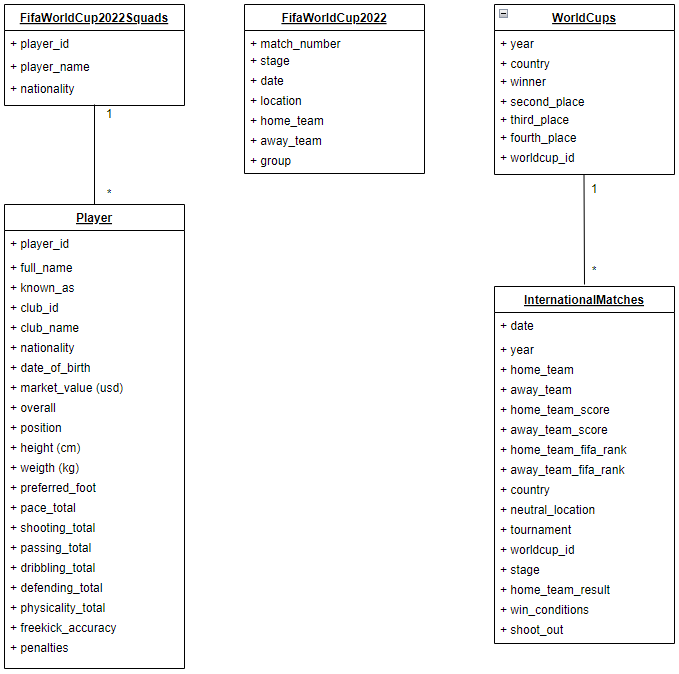

In [113]:
from IPython.display import Image
Image("/content/Metadatos.png")